# Hotel Booking Demand Analysis

The analysis will use the Hotel Booking Demand data with the aim to answer the following questions:

**What is the lead time of bookings, does this differ if it is a family holiday and how is price related to lead time?**
**What are the features that highly correlate to price(Average Daily Rate)?**
**What are the most popular months for holidays?**

The notebook will follow the CRISP-DM process.


## Get the data

To start lets read the neccessary libraries and import the data from the csv file

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

hotels = pd.read_csv(r'C:\Users\b_iva\Desktop\Udacity\DSND Project 1\DSDN Project 1 Hotel Data.csv') #The data that will be manipulated
df = pd.read_csv(r'C:\Users\b_iva\Desktop\Udacity\DSND Project 1\DSDN Project 1 Hotel Data.csv') #Full data


In [180]:
hotels.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03/07/2015


## Clean and explore the data

In this section of the notebook we will find out a bit more for the data which we will be using for the analysis and clean up all the data we will not be using.

In [181]:
print('Shape: {}'.format(hotels.shape)) #Print the length of the data
print('')
print('Columns: {}'.format(hotels.columns)) #Print all columns
print('')
print('Columns with missing values:')
print((hotels.isnull().sum()[hotels.isnull().sum()>0]/hotels.shape[0])*100) #Print the percentage of missing values for the columns

Shape: (119390, 32)

Columns: Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Columns with missing values:
children     0.003350
country      0.408744
agent       13.686238
company     94.306893
dtype: float64


Large number of the columns do not have missing values with the only exception being 'company' and 'agent' which given the relatively high proportion of the missing values will be omitted. 

After reviewing the CSV the following columns have been identified as suitable for the analysis:
- hotel: type of the establishment - Resort or City
- is_canceled: Flag (0,1) indicating if the booking is cancelled
- lead_time: Number of days between the booking was placed and the check in date
- arrival_date_month: The month of the check in date
- arrival_date_day_of_month: The day of the month of the cheeck in date
- stays_in_weekend_nights: Number of weekend days the stay include
- stays_in_week_nights: Number of week days the stay include
- adults: Number of adults
- children: Number of children
- babies: Number of babies
- meal: What type of meal service is included
- country: Country of the hotel
- market_segment: Market segment through which the booking was made
- is_repeated_guest: Flag(0,1) indicating if the quest is repated or not
- previous_cancellations: Number of previous cancellations
- previous_bookings_not_canceled: Number of previous bookings not cancelled
- reserved_room_type: Type of the reserved room
- assigned_room_type: Type of the assigned room
- booking_changes: Number of changes in the bookings
- deposit_type: Type of deposit
- customer_type: Type of the customer
- adr: Average daily rate
- required_car_parking_spaces: Number of required parking spaces
- total_of_special_requests: Number of special requests

-------------------------------------------------------------------------------------------------------------------------------
A new column named change_room will be created to indicate if the change in the reserved room has happened. This will be used as one of the explanatory variables to indicate price.

-------------------------------------------------------------------------------------------------------------------------------
To answer question 1 I will need a proxy for a family holiday, since the data doesn't have a column indicating this.

What I will be using is a flag to indicate whether the booking has children or babies or only adults:
- If there is more than 1 children or baby - it is a family holiday (1)
- If there are no children or babies - it is a non-family holiday (0)
This column will also be used instead of 'adults','children','babies' to analyze correlation.

-------------------------------------------------------------------------------------------------------------------------------
The reason those columns have been chosen is because they are probably all very relevant to the questions imposed,are very clean in terms of missing variables and consistency of the data and logically they seem to be good explanatory variables for the questions imposed.


In [182]:
#Drop the columns we will not be using
hotels = hotels.drop(['arrival_date_year','arrival_date_week_number', 'distribution_channel', 'agent', 'company',
                      'reservation_status', 'reservation_status_date'],axis = 1)

#Drop all na given the small number in the other columns
hotels.dropna()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,July,1,0,0,2,0.0,0,...,0,C,C,3,No Deposit,0,Transient,0.00,0,0
1,Resort Hotel,0,737,July,1,0,0,2,0.0,0,...,0,C,C,4,No Deposit,0,Transient,0.00,0,0
2,Resort Hotel,0,7,July,1,0,1,1,0.0,0,...,0,A,C,0,No Deposit,0,Transient,75.00,0,0
3,Resort Hotel,0,13,July,1,0,1,1,0.0,0,...,0,A,A,0,No Deposit,0,Transient,75.00,0,0
4,Resort Hotel,0,14,July,1,0,2,2,0.0,0,...,0,A,A,0,No Deposit,0,Transient,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,August,30,2,5,2,0.0,0,...,0,A,A,0,No Deposit,0,Transient,96.14,0,0
119386,City Hotel,0,102,August,31,2,5,3,0.0,0,...,0,E,E,0,No Deposit,0,Transient,225.43,0,2
119387,City Hotel,0,34,August,31,2,5,2,0.0,0,...,0,D,D,0,No Deposit,0,Transient,157.71,0,4
119388,City Hotel,0,109,August,31,2,5,2,0.0,0,...,0,A,A,0,No Deposit,0,Transient,104.40,0,0


In [183]:
#Create change_room column

def change_room(row):
    ''' 
    A function that will assign the value of 1 if there is a change in the room type and 0 if not.
    '''
    
    if row['reserved_room_type']==row['assigned_room_type']:
        change_room = 0
    else:
        change_room = 1
    return change_room 

 #Apply the function to a new column, to indicate a change in rooms
hotels['change_room'] = hotels.apply(change_room,axis=1)

In [184]:
#Create family_holiday column

def new_column(row):
    ''' 
    A function that will assign the value of 1 if the stay has been identified as family holiday and 0 if not.
    '''
    
    if (row['children']+row['babies']) > 0:
        family_holiday = 1
    else:
        family_holiday = 0
    return family_holiday

#Apply the function to a new column
hotels['family_holiday'] = hotels.apply(new_column,axis=1)

## Encode the data

There are quite a few categorical features that will need to be encoded to be able to perform the correlation.(No need for dummy variables given there is no missing data)

I will use pandas cat.codes accessor to get this done. Having a higher number here won't affect anything since we are only categorizing variables.

In [185]:
#Create a list of all columns needed categorization
categorize_column = ['hotel', 'meal','country', 'market_segment',  'reserved_room_type',
       'assigned_room_type', 'deposit_type', 'customer_type'
       ]

#Label encode all categorical columns
for x in categorize_column:
    hotels[x] = hotels[x].astype('category')
    hotels[x]= hotels[x].cat.codes

#Categorize month in a new column
hotels['arrival_date_month'] = hotels['arrival_date_month'].astype('category')
hotels['arrival_date_month_cat']= hotels['arrival_date_month'].cat.codes

In [186]:
hotels.head()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,change_room,family_holiday,arrival_date_month_cat
0,1,0,342,July,1,0,0,2,0.0,0,...,3,0,0,2,0.0,0,0,0,0,5
1,1,0,737,July,1,0,0,2,0.0,0,...,4,0,0,2,0.0,0,0,0,0,5
2,1,0,7,July,1,0,1,1,0.0,0,...,0,0,0,2,75.0,0,0,1,0,5
3,1,0,13,July,1,0,1,1,0.0,0,...,0,0,0,2,75.0,0,0,0,0,5
4,1,0,14,July,1,0,2,2,0.0,0,...,0,0,0,2,98.0,0,1,0,0,5


##  Question 1 

What is the lead time of bookings and does this differ if it is a family holiday?

Num of holidays: (119390, 28)
Mean Lead time: 104.01141636652986


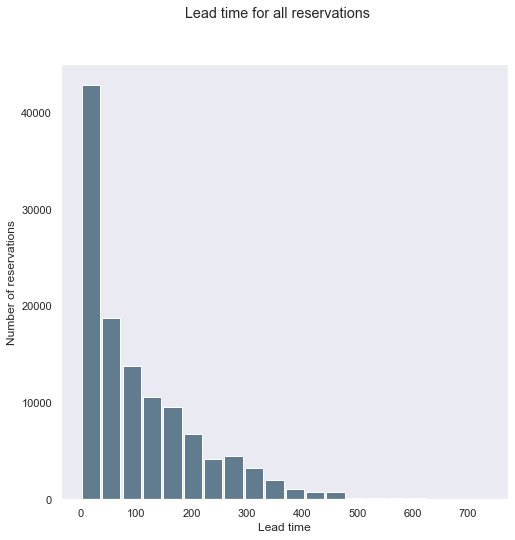

In [198]:
hotels.lead_time.hist(grid=False, bins=20, rwidth=0.9,color='#607c8e',figsize=(8,8));
plt.suptitle("Lead time for all reservations");   
plt.xlabel('Lead time(days)');
plt.ylabel('Number of reservations');

print ('Num of holidays: {}'.format(hotels.shape))
print ('Mean Lead time: {}'.format(hotels.lead_time.mean()))

Num of Family holidays: (9332, 28)
Mean Lead time of family holidays: 88.54779254179168


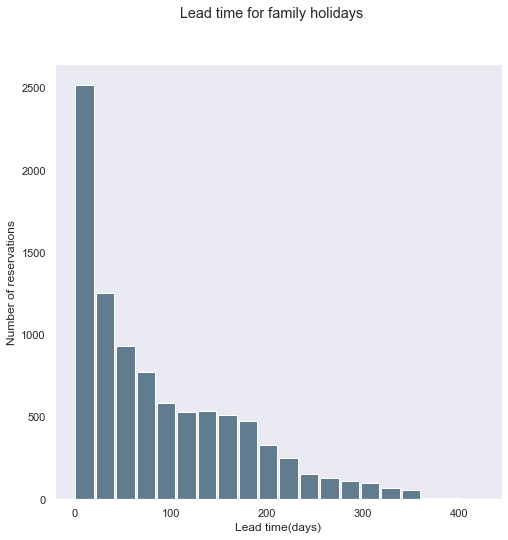

In [200]:
hotels[hotels['family_holiday']==1].lead_time.hist(grid=False, bins=20, rwidth=0.9,color='#607c8e',figsize=(8,8));
plt.suptitle("Lead time for family holidays");   
plt.xlabel('Lead time(days)');
plt.ylabel('Number of reservations');

print ('Num of Family holidays: {}'.format(hotels[hotels['family_holiday']==1].shape))
print ('Mean Lead time of family holidays: {}'.format(hotels[hotels['family_holiday']==1].lead_time.mean()))

Num of Non-Family holidays: (110058, 28)
Mean Lead time of Non-Family holidays: 105.3226026277054


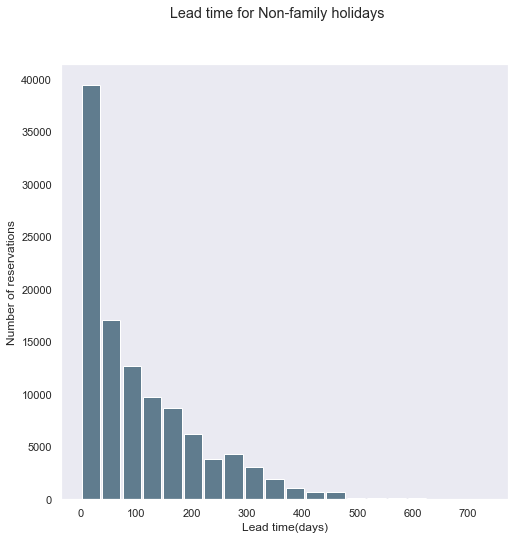

In [201]:
hotels[hotels['family_holiday']==0].lead_time.hist(grid=False, bins=20, rwidth=0.9,color='#607c8e',figsize=(8,8));
plt.suptitle("Lead time for Non-family holidays") ; 
plt.xlabel('Lead time(days)');
plt.ylabel('Number of reservations');

print ('Num of Non-Family holidays: {}'.format(hotels[hotels['family_holiday']==0].shape))
print ('Mean Lead time of Non-Family holidays: {}'.format(hotels[hotels['family_holiday']==0].lead_time.mean()))

The breakdowns above show a relatively low proportion of family holidays - only 9,932 while the Non-Family holidays are 110,058. Lead time, however differs suggesting that families tend to book closer to departure date - 89 days lead time, compared to non-family holidays with 105 days lead time.

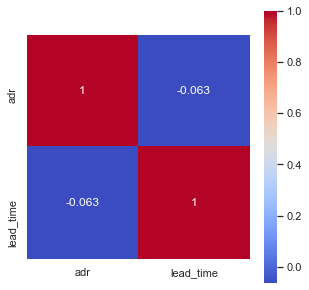

In [206]:
#Correlation matrix of the Lead time and adr
cols_corr = ['adr','lead_time']


corrs = np.corrcoef(hotels[cols_corr].values.T)
fig, ax = plt.subplots(figsize=(5,5))
sns.set(font_scale=1)
hm=sns.heatmap(corrs, cbar = True, annot=True, square = True, cmap='coolwarm',
              yticklabels = cols_corr, xticklabels = cols_corr)

## Question 2

What are the features that highly correlate to price(Average Daily Rate)?

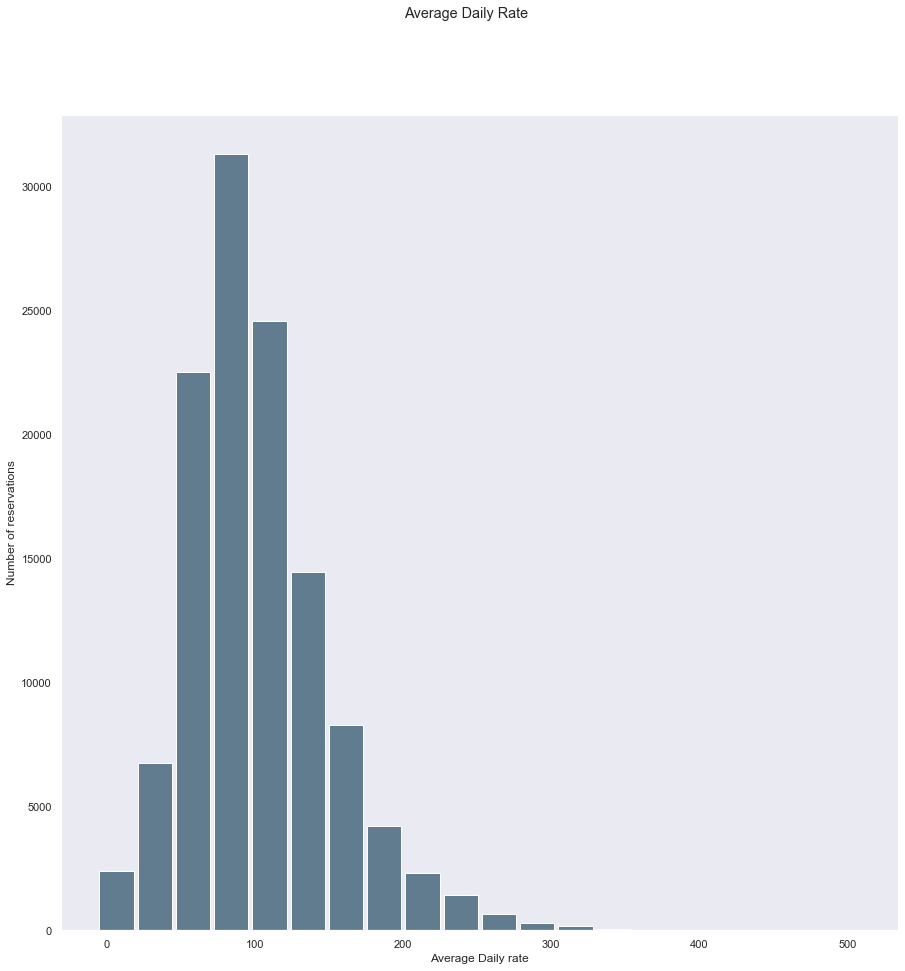

In [190]:
hotels[hotels['adr']<5000].adr.hist(grid=False, bins=20, rwidth=0.9,color='#607c8e',figsize=(15,15));
#An outlier of 5000 adr was identified and excluded from the chart below

plt.suptitle("Average Daily Rate") ; 
plt.xlabel('Average Daily rate');
plt.ylabel('Number of reservations');

The histogram above shows that on average the adr is distributed between 80 and 120.

The correlation matrices below are split into two for readabililty, however a top 10 correlation matrix is produced in the end.

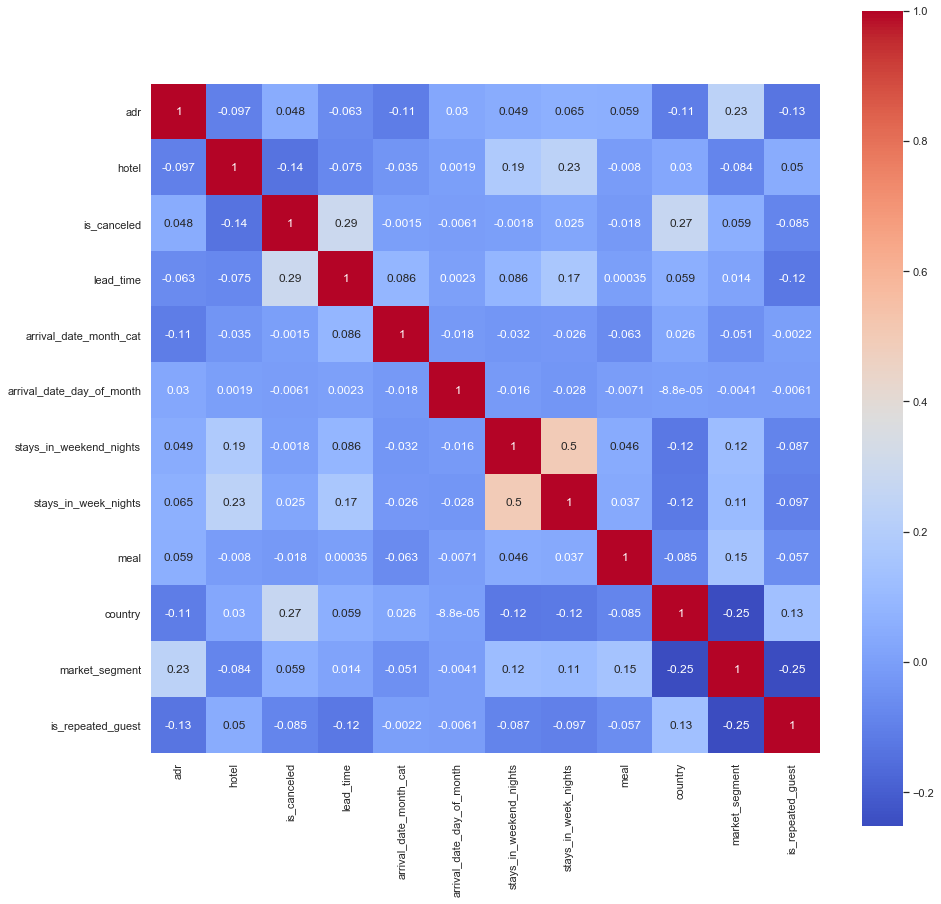

In [191]:
#Correlation matrix of the first half of variables
cols_corr = ['adr','hotel', 'is_canceled', 'lead_time',
       'arrival_date_month_cat','arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal','country', 'market_segment','is_repeated_guest']


corrs = np.corrcoef(hotels[cols_corr].values.T)
fig, ax = plt.subplots(figsize=(15,15))
sns.set(font_scale=1)
hm=sns.heatmap(corrs, cbar = True, annot=True, square = True, cmap='coolwarm',
              yticklabels = cols_corr, xticklabels = cols_corr)

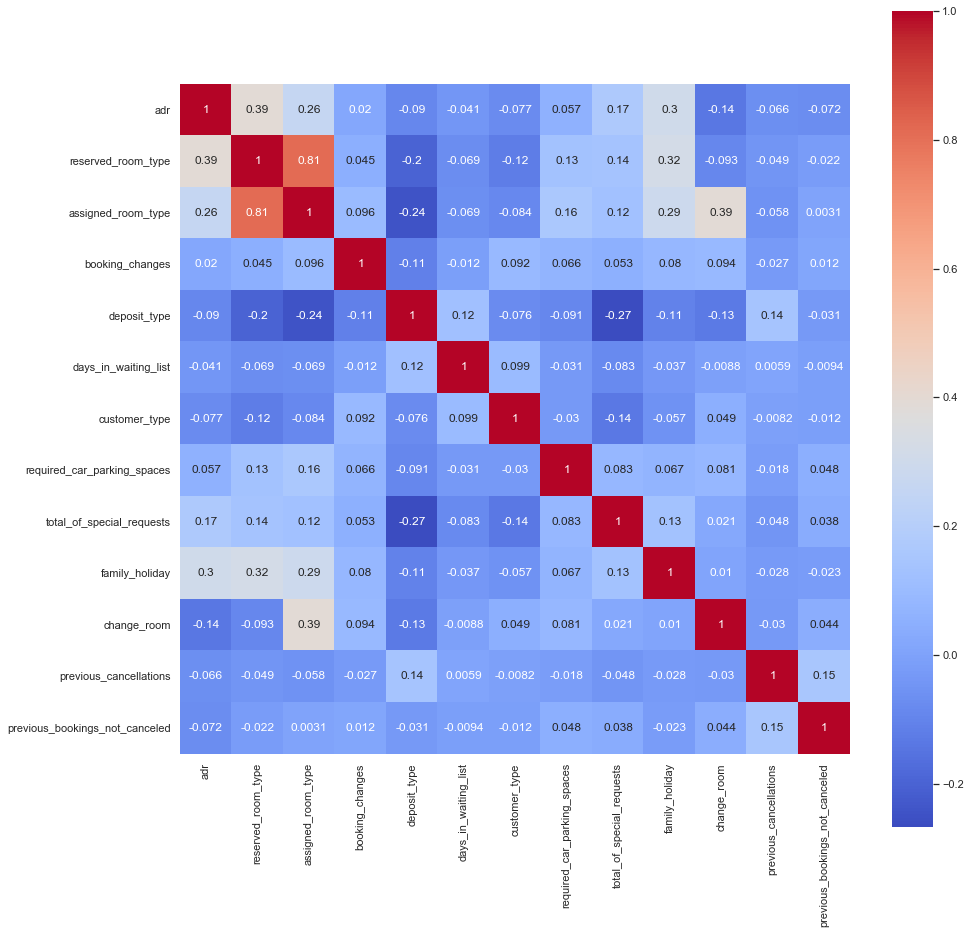

In [192]:
#Correlation matrix of the second half of variables
cols_corr = ['adr', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
        'days_in_waiting_list', 'customer_type',
       'required_car_parking_spaces', 'total_of_special_requests',
       'family_holiday','change_room','previous_cancellations',
       'previous_bookings_not_canceled']


corrs = np.corrcoef(hotels[cols_corr].values.T)
fig, ax = plt.subplots(figsize=(15,15))
sns.set(font_scale=1)
hm=sns.heatmap(corrs, cbar = True, annot=True, square = True, cmap='coolwarm',
              yticklabels = cols_corr, xticklabels = cols_corr)


Below are the top 10 correlations identifed from above.

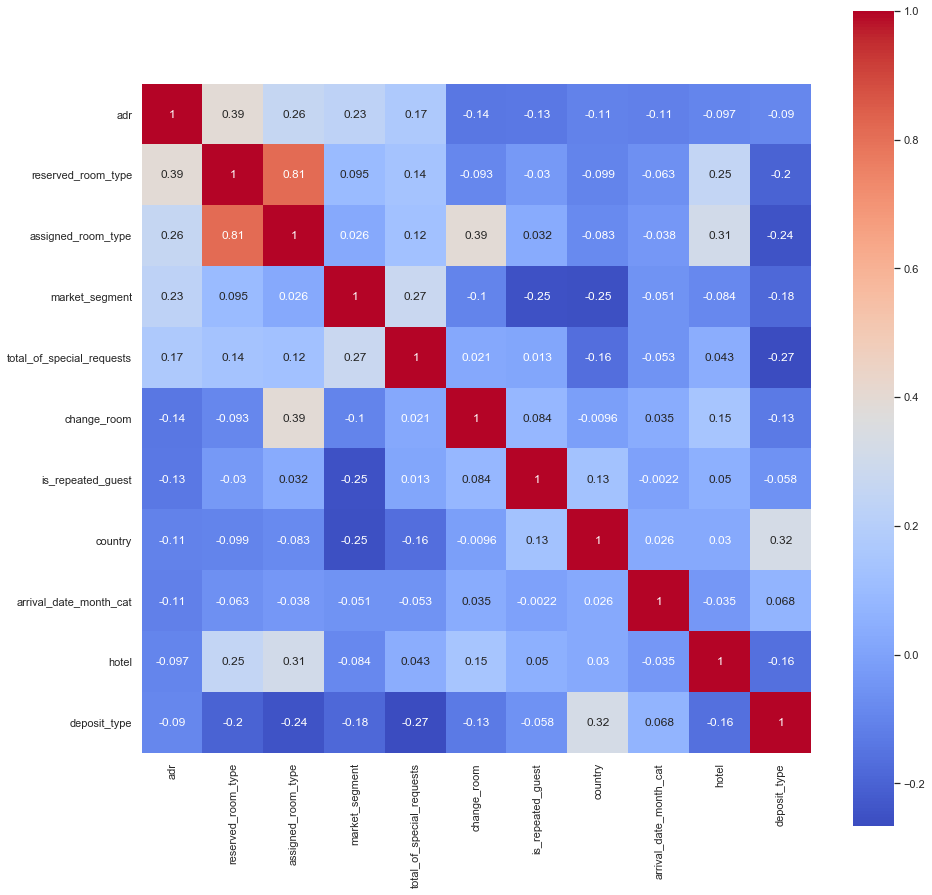

In [193]:
#Correlation matrix of the second half of variables
cols_corr = ['adr', 'reserved_room_type',
       'assigned_room_type','market_segment','total_of_special_requests','change_room','is_repeated_guest','country',
            'arrival_date_month_cat','hotel','deposit_type']


corrs = np.corrcoef(hotels[cols_corr].values.T)
fig, ax = plt.subplots(figsize=(15,15))
sns.set(font_scale=1)
hm=sns.heatmap(corrs, cbar = True, annot=True, square = True, cmap='coolwarm',
              yticklabels = cols_corr, xticklabels = cols_corr)

### Top Correlations to Average Daily Rate:

- Reserved Room Type
- Assigned Room Type
- Market Segment

## Question 3

What are the most popular months for holidays?


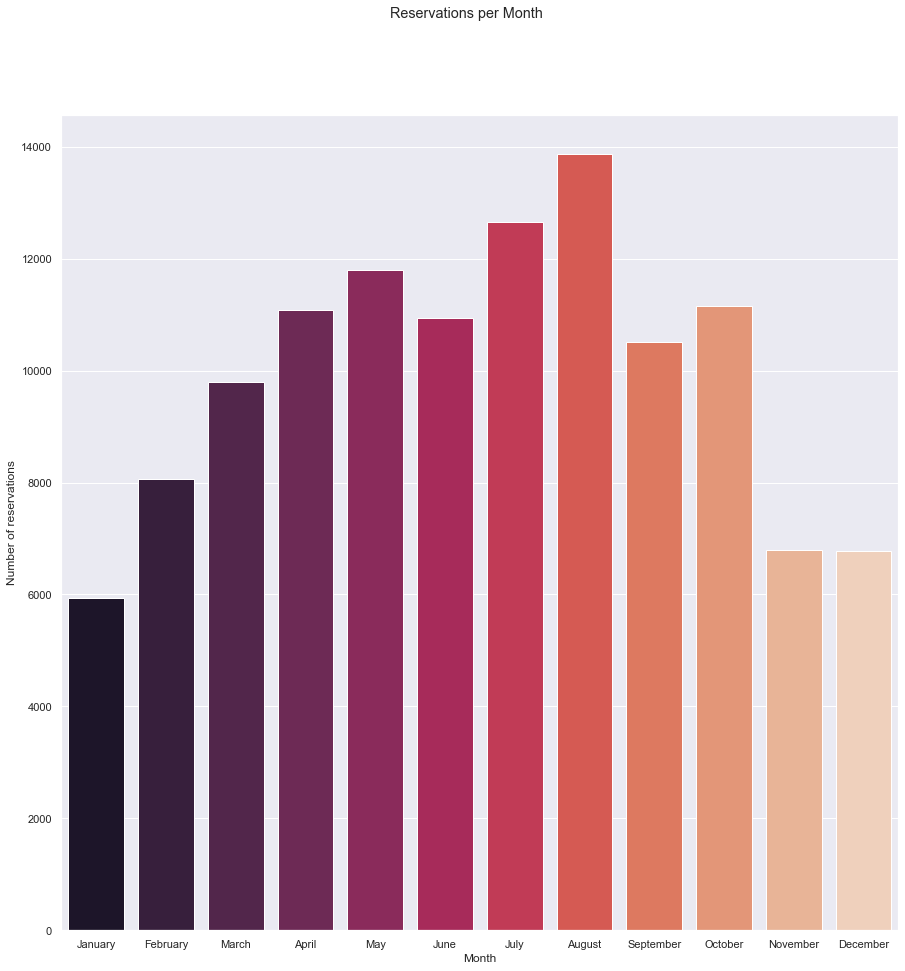

In [194]:
fig, ax = plt.subplots(figsize=(15,15))
sns.countplot(hotels.arrival_date_month, order=['January','February','March','April'
                                                   ,'May','June','July','August','September'
                                                   ,'October','November','December'],palette='rocket')
plt.suptitle("Reservations per Month"); 
plt.xlabel('Month');
plt.ylabel('Number of reservations');

The above chart shows that the largest part of the reservations are made during the summer months, with a falldown in the winter.

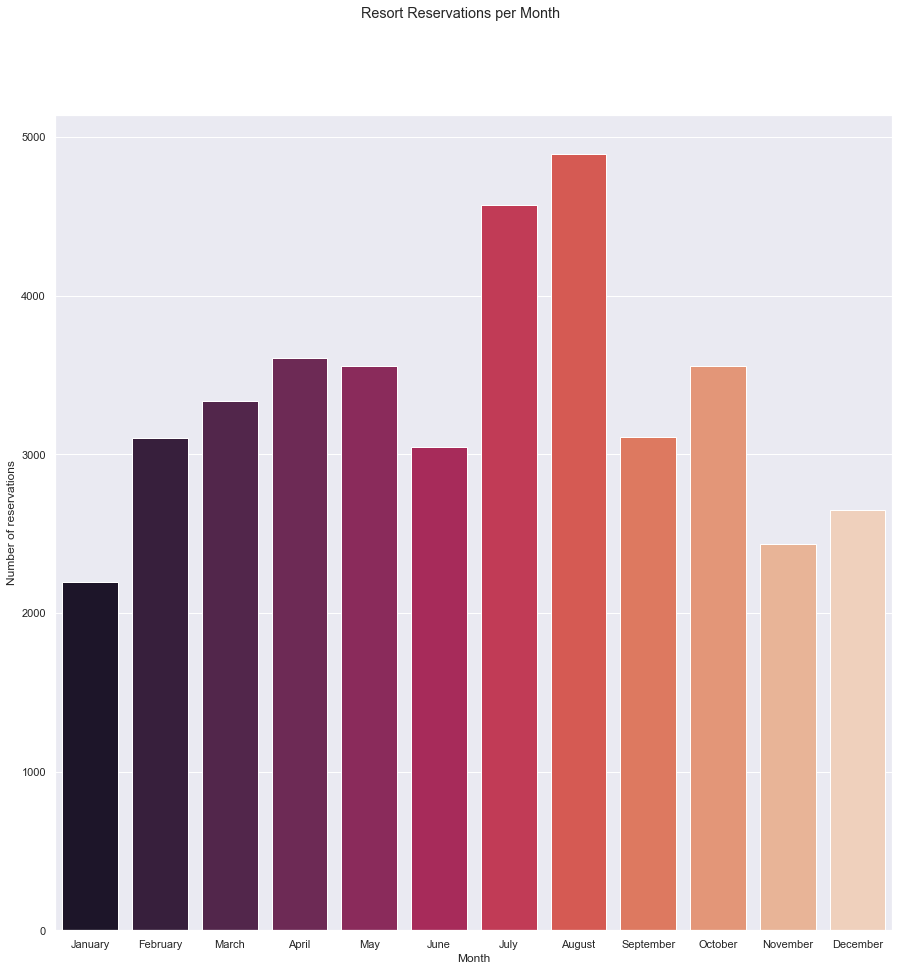

In [195]:
fig, ax = plt.subplots(figsize=(15,15))
sns.countplot(hotels[hotels['hotel']==1].arrival_date_month, order=['January','February','March','April'
                                                   ,'May','June','July','August','September'
                                                   ,'October','November','December'],palette='rocket')
plt.suptitle("Resort Reservations per Month"); 
plt.xlabel('Month');
plt.ylabel('Number of reservations');

From the plot below we can see that there is a spike of Resort reservations in July and August.

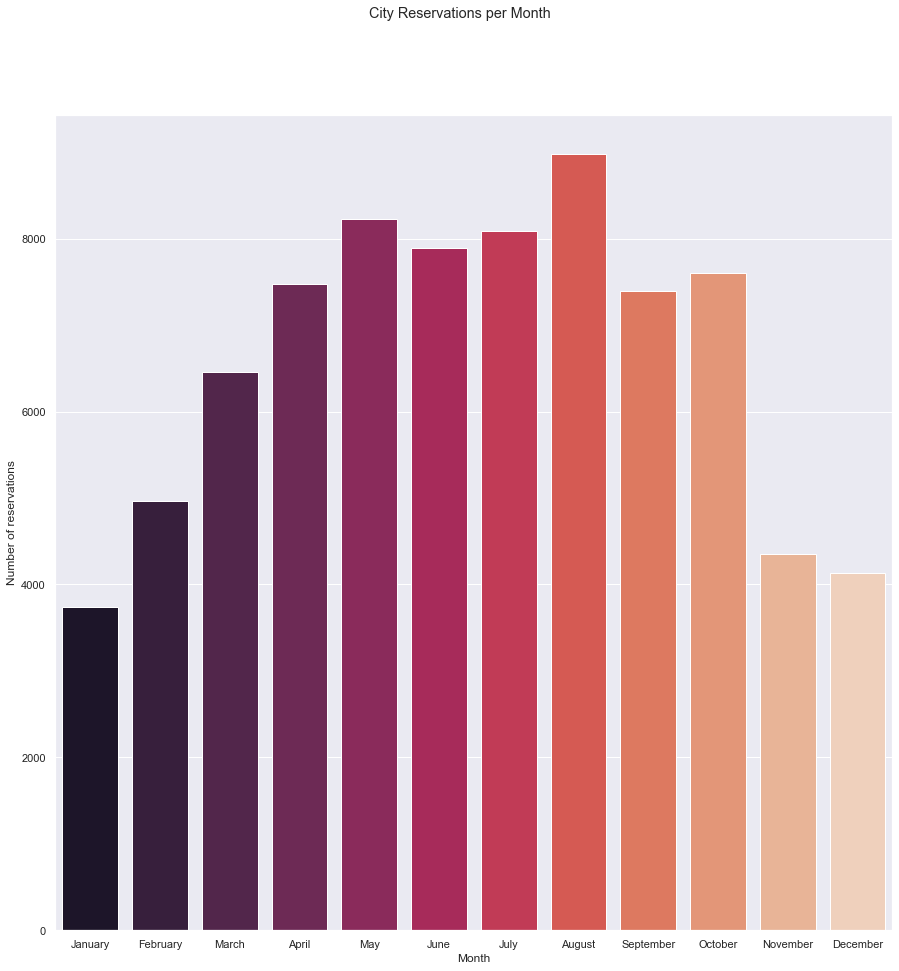

In [196]:
fig, ax = plt.subplots(figsize=(15,15))
sns.countplot(hotels[hotels['hotel']==0].arrival_date_month, order=['January','February','March','April'
                                                   ,'May','June','July','August','September'
                                                   ,'October','November','December'],palette='rocket')
plt.suptitle("City Reservations per Month"); 
plt.xlabel('Month');
plt.ylabel('Number of reservations');